In [4]:
import pandas as pd
import numpy as np
from rdkit import Chem

In [5]:
df_confs = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Naef_Training_incl_num_confs_and_tabs.csv')
df_confs['smiles'] = df_confs['molblock'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromMolBlock(x)))
df_confs_organic = df_confs[~df_confs['smiles'].str.contains('B|Si|As|Se')]
print(len(df_confs)-len(df_confs_organic), 'inorganic compounds (containing B, Si, As, or Se) removed')

229 inorganic compounds (containing B, Si, As, or Se) removed


In [9]:
#get top 10% ntabs
flexible_df = df_confs_organic[df_confs_organic['ntabs'] > df_confs_organic['ntabs'].quantile(0.9)]
print('Top 10% of compounds by number of tabs:', len(flexible_df))
flex_molregnos = flexible_df['molregno'].values
flex_molregnos

Top 10% of compounds by number of tabs: 278


array([   23,    30,    41,    99,   106,   119,   124,   125,   132,
         193,   218,   223,   225,   232,   258,   263,   276,   287,
         296,   297,   306,   309,   323,   331,   342,   347,   360,
         365,   432,   434,   436,   439,   471,   473,   486,   497,
         529,   534,   537,   551,   557,   587,   592,   600,   643,
         656,   682,   689,   726,   745,   746,   771,   782,   797,
         814,   819,   835,   904,   949,  1010,  1015,  1077,  2262,
        2317,  2367,  2409,  2418,  2423,  2565,  2589,  2608,  2610,
        2620,  2639,  2647,  2673,  2679,  2688,  2722,  2723,  2725,
        2766,  2787,  2802,  2857,  2867,  2875,  2895,  2905,  2920,
        2934,  2953,  2965,  2982,  3037,  3038,  3052,  3069,  3071,
        3097,  3104,  3116,  3144,  3162,  3175,  3209,  3217,  3235,
        3236,  3249,  3276,  3307,  3311,  3313,  3321,  3326,  3332,
        3368,  3371,  3395,  3404,  3411,  3421,  3457,  3463,  3475,
        3493,  3523,

In [10]:
#multiple confs: 11093a30-b6d0-4e3f-a22b-8dcad60d6a11
import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=scotland")
cur = conn.cursor()
query = """

SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
JOIN 
    cs_mdfps_schema.confid_data cd ON c.conf_id = cd.conf_id
WHERE 
    cd.confgen_uuid = '11093a30-b6d0-4e3f-a22b-8dcad60d6a11';

"""

cur.execute(query)
data = cur.fetchall()

In [13]:
multiple_confs_df = pd.DataFrame(data, columns=['molregno', 'conf_id', 'vp_log10_pa', 'mdfp', 'molblock'])
multiple_confs_flexible_mols_df = multiple_confs_df[multiple_confs_df['molregno'].isin(flex_molregnos)]
multiple_confs_flexible_mols_df

,molregno,conf_id,vp_log10_pa,mdfp,molblock
35,2934,4471,-4.426098,"{'mdfp': '[27, 24, 0, 0, 0, 0, 0, 0, 0, 0, 7.2...",\n RDKit 3D\n\n 0 0 0 0 0 0...
36,2934,4473,-4.426098,"{'mdfp': '[27, 24, 0, 0, 0, 0, 0, 0, 0, 0, 7.1...",\n RDKit 3D\n\n 0 0 0 0 0 0...
44,263,4614,-1.169199,"{'mdfp': '[18, 11, 0, 4, 0, 0, 0, 0, 0, 0, -17...",\n RDKit 3D\n\n 0 0 0 0 0 0...
50,3463,4703,-4.795899,"{'mdfp': '[21, 4, 4, 3, 0, 0, 1, 0, 0, 0, -81....",\n RDKit 3D\n\n 0 0 0 0 0 0...
51,3463,4705,-4.795899,"{'mdfp': '[21, 4, 4, 3, 0, 0, 1, 0, 0, 0, -81....",\n RDKit 3D\n\n 0 0 0 0 0 0...
...,...,...,...,...,...
7508,119,15201,-3.134698,"{'mdfp': '[28, 14, 0, 4, 0, 0, 0, 0, 0, 0, -9....",\n RDKit 3D\n\n 0 0 0 0 0 0...
7511,2589,15249,-2.500000,"{'mdfp': '[17, 5, 1, 5, 0, 1, 1, 0, 0, 0, -314...",\n RDKit 3D\n\n 0 0 0 0 0 0...
7515,3071,15264,-2.850198,"{'mdfp': '[20, 17, 0, 0, 0, 0, 0, 0, 0, 0, 13....",\n RDKit 3D\n\n 0 0 0 0 0 0...
7516,3071,15267,-2.850198,"{'mdfp': '[20, 17, 0, 0, 0, 0, 0, 0, 0, 0, 13....",\n RDKit 3D\n\n 0 0 0 0 0 0...


In [14]:
#multiple confs: 11093a30-b6d0-4e3f-a22b-8dcad60d6a11
import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=scotland")
cur = conn.cursor()
query = """

SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
    AND m.md_experiment_uuid = '80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a';

"""

cur.execute(query)
data = cur.fetchall()

long_sims_df = pd.DataFrame(data, columns=['molregno', 'conf_id', 'vp_log10_pa', 'mdfp', 'molblock'])
long_sims_flexible_mols_df = long_sims_df[long_sims_df['molregno'].isin(flex_molregnos)]
long_sims_flexible_mols_df

,molregno,conf_id,vp_log10_pa,mdfp,molblock
7,2409,2407,-5.082698,"{'mdfp': '[23, 8, 1, 4, 0, 1, 2, 1, 0, 0, -726...",[H]c1c([H])c([H])c2c(c1[H])C(=O)N([C@]([H])(SP...
9,2418,2416,1.137701,"{'mdfp': '[11, 8, 0, 1, 0, 0, 0, 0, 0, 0, -7.1...",[H]C(=O)C([H])([H])C([H])([H])C([H])([H])C([H]...
34,23,1166,-5.480597,"{'mdfp': '[24, 7, 4, 4, 3, 0, 0, 0, 0, 0, -753...",[H]c1c([N+](=O)[O-])c(N(C([H])([H])C([H])([H])...
41,30,1173,-1.222000,"{'mdfp': '[17, 14, 1, 0, 0, 0, 0, 0, 0, 0, -4....",[H]N(C([H])([H])C([H])([H])C([H])([H])C([H])([...
49,41,1184,-0.453498,"{'mdfp': '[16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 12....",[H]C([H])=C([H])C([H])([H])C([H])([H])C([H])([...
...,...,...,...,...,...
10895,17133,17131,-0.719799,None,[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H]...
10921,3332,17184,-3.346198,None,[H]C([H])([H])OP(=S)(OC([H])([H])[H])S[C@@]([H...
10923,3395,17186,-3.460098,None,[H]c1c([H])c([H])c([C@]([H])(SP(=S)(OC([H])([H...
10927,2965,17189,-4.876000,None,[H]C([H])([H])S/C(=N/OC(=O)N(SN(C(=O)O/N=C(/SC...


In [17]:
long_sims_flexible_mols_df

,molregno,conf_id,vp_log10_pa,mdfp,molblock
7,2409,2407,-5.082698,"{'mdfp': '[23, 8, 1, 4, 0, 1, 2, 1, 0, 0, -726...",[H]c1c([H])c([H])c2c(c1[H])C(=O)N([C@]([H])(SP...
9,2418,2416,1.137701,"{'mdfp': '[11, 8, 0, 1, 0, 0, 0, 0, 0, 0, -7.1...",[H]C(=O)C([H])([H])C([H])([H])C([H])([H])C([H]...
34,23,1166,-5.480597,"{'mdfp': '[24, 7, 4, 4, 3, 0, 0, 0, 0, 0, -753...",[H]c1c([N+](=O)[O-])c(N(C([H])([H])C([H])([H])...
41,30,1173,-1.222000,"{'mdfp': '[17, 14, 1, 0, 0, 0, 0, 0, 0, 0, -4....",[H]N(C([H])([H])C([H])([H])C([H])([H])C([H])([...
49,41,1184,-0.453498,"{'mdfp': '[16, 13, 0, 0, 0, 0, 0, 0, 0, 0, 12....",[H]C([H])=C([H])C([H])([H])C([H])([H])C([H])([...
...,...,...,...,...,...
10895,17133,17131,-0.719799,None,[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H]...
10921,3332,17184,-3.346198,None,[H]C([H])([H])OP(=S)(OC([H])([H])[H])S[C@@]([H...
10923,3395,17186,-3.460098,None,[H]c1c([H])c([H])c([C@]([H])(SP(=S)(OC([H])([H...
10927,2965,17189,-4.876000,None,[H]C([H])([H])S/C(=N/OC(=O)N(SN(C(=O)O/N=C(/SC...


In [18]:
#multiple confs: 11093a30-b6d0-4e3f-a22b-8dcad60d6a11
import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=scotland")
cur = conn.cursor()
query = """

SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
"""

cur.execute(query)
data = cur.fetchall()

df_all = pd.DataFrame(data, columns=['molregno', 'conf_id', 'vp_log10_pa', 'mdfp', 'molblock'])


12776


(array([2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.600e+01,
        1.600e+01, 8.700e+01, 1.270e+02, 2.960e+02, 6.860e+02, 1.258e+03,
        1.321e+03, 1.294e+03, 1.417e+03, 1.971e+03, 2.542e+03, 1.461e+03,
        2.480e+02, 2.800e+01]),
 array([-19.36      , -18.00234489, -16.64468978, -15.28703466,
        -13.92937955, -12.57172444, -11.21406933,  -9.85641422,
         -8.49875911,  -7.14110399,  -5.78344888,  -4.42579377,
         -3.06813866,  -1.71048355,  -0.35282843,   1.00482668,
          2.36248179,   3.7201369 ,   5.07779201,   6.43544712,
          7.79310224]),
 <BarContainer object of 20 artists>)

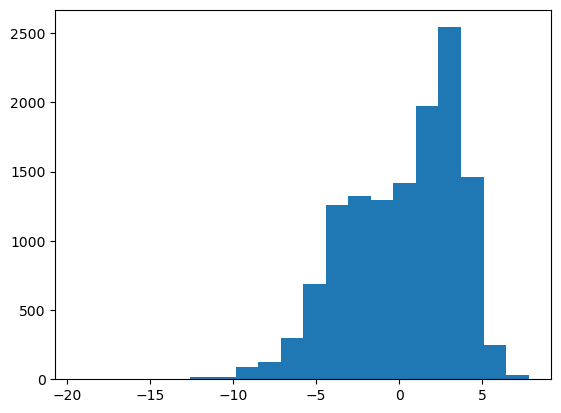

In [24]:
#drop where mdfp is nan
df_all = df_all.dropna(subset=['mdfp'])
print(len(df_all))
#plot vp_log10_pa
import matplotlib.pyplot as plt
plt.hist(df_all['vp_log10_pa'], bins=20)

In [25]:
df = df_all.copy()
import json
df['mdfp_vec'] = df['mdfp'].apply(lambda val: json.loads(val['mdfp']) if (val and 'mdfp' in val) else None)
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
                     'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']

# Assuming 'mdfp_vec' is the column containing the lists
df[mdfp_features_all] = pd.DataFrame(df['mdfp_vec'].apply(lambda x: x if x is not None else pd.Series(dtype=float)).to_list(), index=df.index)

In [35]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
df['ROMol'] = df['molblock'].apply(Chem.MolFromMolBlock)
df['descriptors'] = df['ROMol'].apply(Descriptors.CalcMolDescriptors)
df = pd.concat([df, pd.DataFrame(df['descriptors'].apply(lambda x: x if x is not None else {}).to_list(), index=df.index)], axis=1)

In [47]:
df_test = pd.read_csv('OPERA_Naef_Stratified_Test.csv')
#remove these molregnos from the training set
df = df[~df['molregno'].isin(df_test['molregno'])]
#drop col NumRotatableBonds
df = df.drop(columns=['NumRotatableBonds'])
#add col NumRotatableBonds
df['NumRotatableBonds'] = df['ROMol'].apply(Descriptors.NumRotatableBonds)
df['smiles'] = df['ROMol'].apply(Chem.MolToSmiles)
df = df[~df['smiles'].str.contains('B|Si|As|Se')]


In [41]:
from sklearn.model_selection import GroupShuffleSplit 
df_train_list,df_val_list = [],[]
for i in range(10):
    splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = i)
    split = splitter.split(df, groups=df['molregno'])
    train_inds, test_inds = next(split)
    train = df.iloc[train_inds]
    test = df.iloc[test_inds]
    assert len(set(train['molregno']).intersection(set(test['molregno']))) == 0
    df_train_list.append(train)
    df_val_list.append(test)

In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def XGBOOST_random_splits(params, descriptors,train_dfs,val_dfs,drop_dup_molregnos = False):
    pred_list,ys_list,molregnos = [],[],[]
    i = 0
    for df_train,df_val in zip(train_dfs,val_dfs):
        if drop_dup_molregnos:
            df_train = df_train.drop_duplicates(subset='molregno')
            df_val = df_val.drop_duplicates(subset='molregno')
        train_X = df_train[descriptors]
        train_y = df_train['vp_log10_pa']
        val_X = df_val[descriptors]
        val_y = df_val['vp_log10_pa']
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dval = xgb.DMatrix(val_X, label=val_y)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )
        preds = model.predict(dval)
        rmse = mean_squared_error(val_y, preds, squared=False)
        pred_list.append(preds)
        ys_list.append(val_y)
        molregnos.append(df_val['molregno'])
        print(f"Split {i + 1}: RMSE = {rmse}")
        i += 1
    return pred_list, ys_list, molregnos
  

In [49]:
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
                     'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
params = { #hyperparameters optimized by Working Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pred_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus = XGBOOST_random_splits(params, mdfp_features_all, df_train_list, df_val_list)

Split 1: RMSE = 0.9993952069905816
Split 2: RMSE = 0.7944115028637503
Split 3: RMSE = 0.8990929659641436
Split 4: RMSE = 0.9107476980970055
Split 5: RMSE = 0.8077760537470315
Split 6: RMSE = 0.9112291623412727
Split 7: RMSE = 0.931307264501014
Split 8: RMSE = 0.8343562108560815
Split 9: RMSE = 0.8210588552383205
Split 10: RMSE = 0.9107235370220269


In [50]:
pred_list_xgboost_mdfp_plus_single_mols, ys_list_xgboost_mdfp_plus_single_mols, molregnos_xgboost_mdfp_plus_single_mols = XGBOOST_random_splits(params, mdfp_features_all, df_train_list, df_val_list, drop_dup_molregnos=True)

Split 1: RMSE = 0.9323828445725286
Split 2: RMSE = 0.8220599761542887
Split 3: RMSE = 0.8349542773213722
Split 4: RMSE = 0.8430317137178596
Split 5: RMSE = 0.8414344729250555
Split 6: RMSE = 0.8901918448416868
Split 7: RMSE = 0.9527555650608021
Split 8: RMSE = 0.9201998304475901
Split 9: RMSE = 0.933246152011945
Split 10: RMSE = 0.8526169272686487


In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    median_AE = median_absolute_error(np.array(x), np.array(y))

    return RMSE, MAE, EBO, KT, median_AE

def density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, print_stats=True, bounds=None, title=None, print_spearman=False, name=None, dims = (1, 3)):
    # fig, axes = plt.subplots(1, len(reals_list), figsize=(10 * len(reals_list), 8))
    #assert that len(reals_list) is smaller then the number of subplots
    assert len(reals_list) <= dims[0]*dims[1]
    fig, axes = plt.subplots(dims[0], dims[1], figsize=(10 * dims[1], 8 * dims[0]))
    axes = axes.flatten()
    for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
        ax = axes[i] if len(reals_list) > 1 else axes


    # for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
    #     ax = axes[i] if len(reals_list) > 1 else axes

        rmses, maes, ebos, kts, median_aes = [], [], [], [], []

        for r, p in zip(reals, predictions):
            RMSE, MAE, EBO, KT, median_AE = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            median_aes.append(median_AE)

        rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
        rmse_mean = np.mean(rmses)
        mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
        kt_mean = np.mean(kts)
        median_AE_90_low, median_AE_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(median_aes), scale=stats.sem(median_aes))
        median_AE_mean = np.mean(median_aes)

        mrn = [item for sublist in molregnos for item in sublist]
        real = [item for sublist in reals for item in sublist]
        prediction = [item for sublist in predictions for item in sublist]

        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()

        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")

        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]

        ax.axis([lower, upper, lower, upper])

        text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMedian AE: {median_AE_mean:.2f} ({median_AE_90_low:.2f}-{median_AE_90_high:.2f})\nMean AE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})',
                           transform=ax.transAxes, fontsize=12, verticalalignment='top',
                           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        if title is not None:
            ax.set_title(title[i] if len(reals_list) > 1 else title, fontsize=14)

        ax.set_aspect('equal', 'box')

    if name:
        plt.savefig(f'{name}.png', dpi=800, bbox_inches='tight')
    else:
        plt.show()


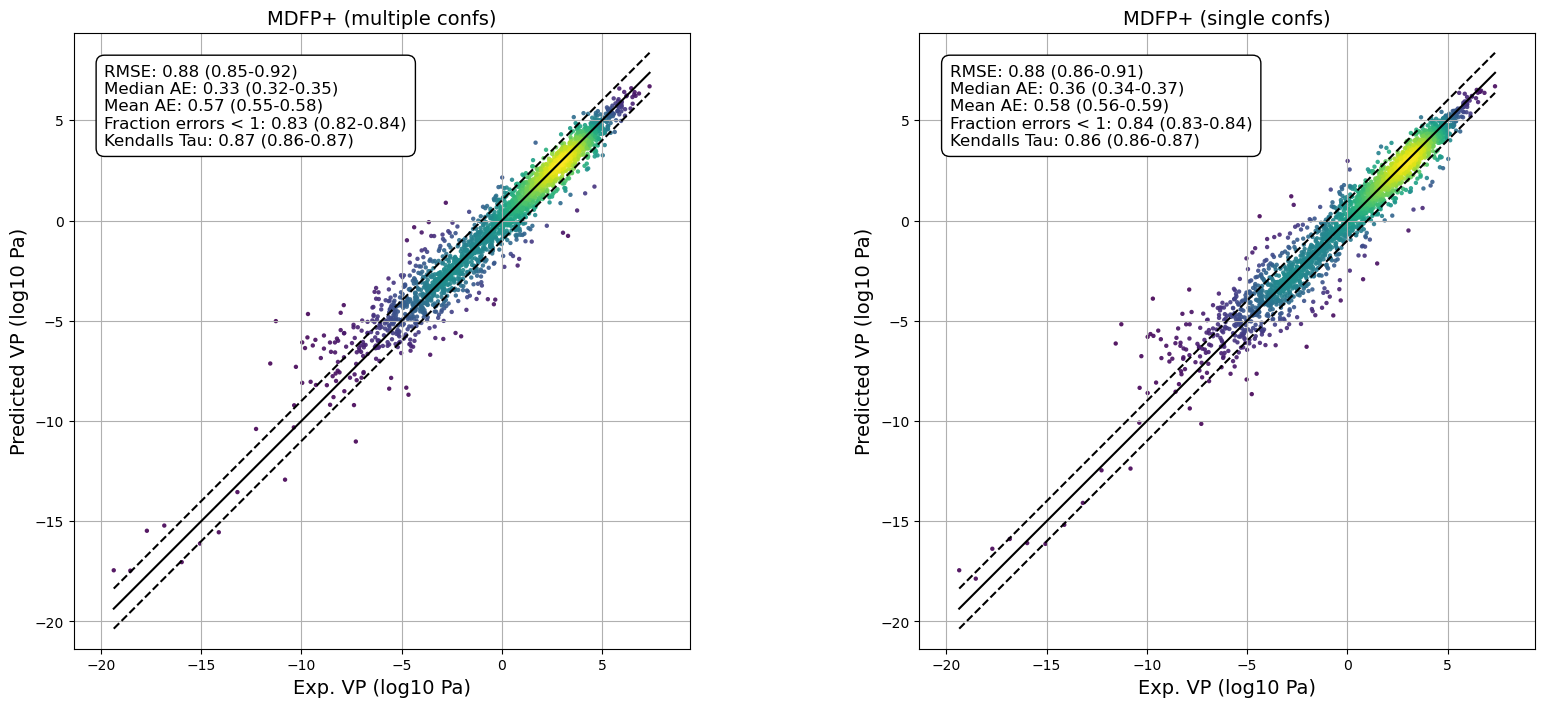

In [52]:
reals_list = [ys_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_plus_single_mols]
predictions_list = [pred_list_xgboost_mdfp_plus, pred_list_xgboost_mdfp_plus_single_mols]
molregnos_list = [molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus_single_mols]
title = ['MDFP+ (multiple confs)', 'MDFP+ (single confs)']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='MDFP_plus_multiple_vs_single_confs', dims=(1, 2))

Text(0, 0.5, 'AE_single_confs')

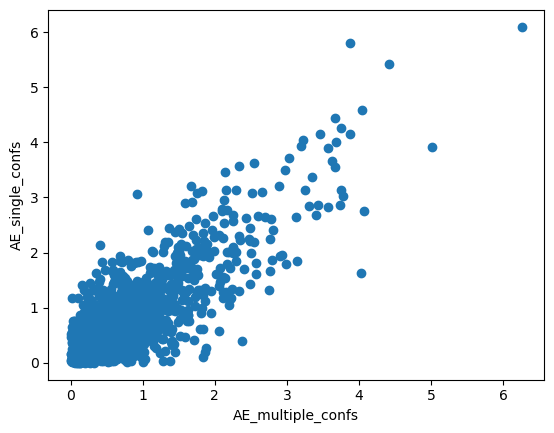

In [57]:
preds_list_flat = [item for sublist in pred_list_xgboost_mdfp_plus for item in sublist]
ys_list_flat = [item for sublist in ys_list_xgboost_mdfp_plus for item in sublist]
molregnos_flat = [item for sublist in molregnos_xgboost_mdfp_plus for item in sublist]
df_results = pd.DataFrame({'molregno': molregnos_flat, 'vp_log10_pa': ys_list_flat, 'preds': preds_list_flat})
df_results['AE'] = np.abs(df_results['vp_log10_pa'] - df_results['preds'])
#average over molregno
df_results = df_results.groupby('molregno').mean()
preds_list_flat_single_mols = [item for sublist in pred_list_xgboost_mdfp_plus_single_mols for item in sublist]
ys_list_flat_single_mols = [item for sublist in ys_list_xgboost_mdfp_plus_single_mols for item in sublist]
molregnos_flat_single_mols = [item for sublist in molregnos_xgboost_mdfp_plus_single_mols for item in sublist]
df_results_single_mols = pd.DataFrame({'molregno': molregnos_flat_single_mols, 'vp_log10_pa': ys_list_flat_single_mols, 'preds': preds_list_flat_single_mols})
df_results_single_mols['AE'] = np.abs(df_results_single_mols['vp_log10_pa'] - df_results_single_mols['preds'])
#average over molregno
df_results_single_mols = df_results_single_mols.groupby('molregno').mean()
#combine on molregno, suffix multiple_confs and single_confs
df_results_combined = df_results.merge(df_results_single_mols, on='molregno', suffixes=('_multiple_confs', '_single_confs'))
#scatter plot of AE_multiple_confs vs AE_single_confs
plt.scatter(df_results_combined['AE_multiple_confs'], df_results_combined['AE_single_confs'])
plt.xlabel('AE_multiple_confs')
plt.ylabel('AE_single_confs')


In [61]:
# df_results_combined
#and load
import pickle
with open('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/splits/predictions/molregno_to_ntabs.pkl', 'rb') as f:
    molregno_to_ntabs = pickle.load(f)
df_results_combined['ntabs'] = df_results_combined.index.map(molregno_to_ntabs)


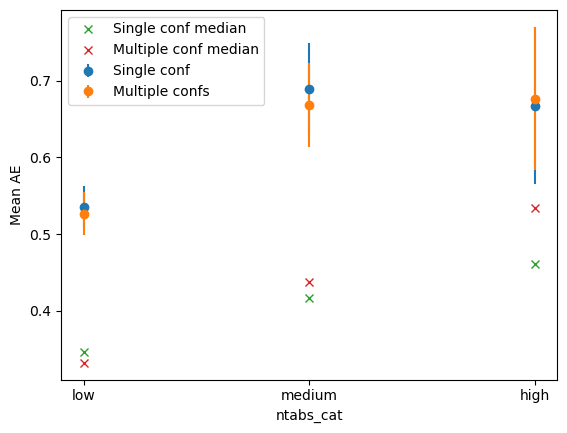

In [69]:
#ntabs_cat: <= 50 ntabs = 'low', 50-99999 ntabs = 'medium', > 99999 ntabs = 'high'
df_results = df_results_combined.copy()
df_results['ntabs_cat'] = pd.cut(df_results['ntabs'], bins=[0, 50, 99999, 100000000], labels=['low', 'medium', 'high'])
df_results['ntabs_cat'].value_counts()
#barplot: mean and 95CI of AE PhysChem and AE MDFP per ntabs_cat
import matplotlib.pyplot as plt
import seaborn as sns

#calculate mean and 95CI of AE PhysChem and AE MDFP per ntabs_cat
single_conf_means = df_results.groupby('ntabs_cat')['AE_single_confs'].mean()
single_confs_ci = df_results.groupby('ntabs_cat')['AE_single_confs'].std() * 1.96 / df_results.groupby('ntabs_cat')['AE_single_confs'].count()**0.5

multiple_confs_mean = df_results.groupby('ntabs_cat')['AE_multiple_confs'].mean()
multiple_confs_ci = df_results.groupby('ntabs_cat')['AE_multiple_confs'].std() * 1.96 / df_results.groupby('ntabs_cat')['AE_multiple_confs'].count()**0.5

single_confs_median = df_results.groupby('ntabs_cat')['AE_single_confs'].median()
multiple_confs_medians = df_results.groupby('ntabs_cat')['AE_multiple_confs'].median()
#plot
plt.figure()
x = np.arange(len(single_conf_means))
plt.errorbar(x, single_conf_means, yerr=single_confs_ci, label='Single conf',linestyle='',marker = 'o')
plt.errorbar(x, multiple_confs_mean, yerr=multiple_confs_ci, label='Multiple confs',linestyle='',marker = 'o')
#add medians
plt.plot(x, single_confs_median, label='Single conf median',linestyle='',marker = 'x')
plt.plot(x, multiple_confs_medians, label='Multiple conf median',linestyle='',marker = 'x')
plt.xticks(x, ['low', 'medium', 'high'])
plt.xlabel('ntabs_cat')
plt.ylabel('Mean AE')
plt.legend()
plt.show()



In [74]:
query = """

SELECT 
    e.molregno,
    c.conf_id,
    e.vp_log10_pa,
    m.mdfp,
    c.molblock,
    m.md_experiment_uuid,
    cd.confgen_uuid -- Add this column for confgen_uuid
FROM 
    cs_mdfps_schema.experimental_data e
JOIN 
    conformers c ON e.molregno = c.molregno
LEFT JOIN 
    cs_mdfps_schema.mdfp_experiment_data m ON c.conf_id = m.conf_id
LEFT JOIN 
    cs_mdfps_schema.confid_data cd ON c.conf_id = cd.conf_id; -- Join with confid_data for confgen_uuid


"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['molregno', 'conf_id', 'vp_log10_pa', 'mdfp', 'molblock', 'md_experiment_uuid', 'confgen_uuid'])
df

,molregno,conf_id,vp_log10_pa,mdfp,molblock,md_experiment_uuid,confgen_uuid
0,2403,2401,5.514102,"{'mdfp': '[3, 0, 0, 0, 1, 0, 0, 1, 0, 0, -0.15...",[H]C([H])(F)Cl\n RDKit 3D\n\n 0 ...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835
1,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835
2,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
3,2396,2394,2.092402,"{'mdfp': '[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.69...",[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835
4,2396,2394,2.092402,"{'mdfp': '[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.74...",[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
...,...,...,...,...,...,...,...
13099,3983,3981,-6.259098,"{'mdfp': '[24, 7, 2, 4, 0, 0, 0, 0, 0, 0, -570...",[H]c1c(C(C([H])([H])[H])(C([H])([H])C([H])([H]...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
13100,3984,3982,3.132007,"{'mdfp': '[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.8...",[H]C([H])([H])C([H])([H])C([H])([H])[N+](=O)[O...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835
13101,3984,3982,3.132007,"{'mdfp': '[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.8...",[H]C([H])([H])C([H])([H])C([H])([H])[N+](=O)[O...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835
13102,3989,3987,-0.825900,"{'mdfp': '[8, 3, 0, 3, 0, 0, 0, 0, 0, 0, -236....",[H]OC(=O)C([H])([H])C([H])([H])C(=O)C([H])([H]...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835


In [87]:
#get preds using either df or df selection to compare
import json
df['mdfp_vec'] = df['mdfp'].apply(lambda val: json.loads(val['mdfp']) if (val and 'mdfp' in val) else None)
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
                     'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']

# Assuming 'mdfp_vec' is the column containing the lists
df[mdfp_features_all] = pd.DataFrame(df['mdfp_vec'].apply(lambda x: x if x is not None else pd.Series(dtype=float)).to_list(), index=df.index)
df

,molregno,conf_id,vp_log10_pa,mdfp,molblock,md_experiment_uuid,confgen_uuid,mdfp_vec,NumHeavyAtoms,NumRotatableBonds,...,water_intra_ene_median,water_total_ene_mean,water_total_ene_std,water_total_ene_median,water_rgyr_mean,water_rgyr_std,water_rgyr_median,water_sasa_mean,water_sasa_std,water_sasa_median
0,2403,2401,5.514102,"{'mdfp': '[3, 0, 0, 0, 1, 0, 0, 1, 0, 0, -0.15...",[H]C([H])(F)Cl\n RDKit 3D\n\n 0 ...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[3, 0, 0, 0, 1, 0, 0, 1, 0, 0, -0.156121802776...",3.0,0.0,...,-0.155861,-41.051210,7.860904,-41.080395,0.141389,0.001340,0.141404,1.839182,0.005948,1.839391
1,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24.3601006778...",10.0,1.0,...,5.365511,-70.934826,9.972405,-71.281503,0.239131,0.001923,0.239191,3.536005,0.016917,3.535896
2,2390,2388,2.325202,"{'mdfp': '[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24....",[H]C([H])=C1C([H])=C([H])[C@]([H])(C([H])(C([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[10, 1, 0, 0, 0, 0, 0, 0, 0, 0, -24.3637634540...",10.0,1.0,...,5.081368,-72.161483,10.529911,-72.402603,0.239207,0.001838,0.239275,3.536894,0.017106,3.536101
3,2396,2394,2.092402,"{'mdfp': '[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.69...",[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.698263136483...",7.0,4.0,...,4.536335,-99.462784,13.420137,-99.945157,0.239087,0.012696,0.240421,3.143903,0.052062,3.151172
4,2396,2394,2.092402,"{'mdfp': '[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.74...",[H]OC([H])([H])C([H])([H])C([H])([H])C([H])([H...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[7, 4, 0, 1, 0, 0, 0, 0, 0, 0, -4.742220929815...",7.0,4.0,...,4.578916,-99.110528,13.121092,-99.618129,0.234266,0.012069,0.233745,3.125541,0.054318,3.125999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,3983,3981,-6.259098,"{'mdfp': '[24, 7, 2, 4, 0, 0, 0, 0, 0, 0, -570...",[H]c1c(C(C([H])([H])[H])(C([H])([H])C([H])([H]...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[24, 7, 2, 4, 0, 0, 0, 0, 0, 0, -570.149468376...",24.0,7.0,...,-497.303758,-762.495187,22.795618,-762.280121,0.415372,0.004417,0.415756,6.118110,0.058240,6.128871
13100,3984,3982,3.132007,"{'mdfp': '[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.8...",[H]C([H])([H])C([H])([H])C([H])([H])[N+](=O)[O...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.86853455224...",6.0,2.0,...,-10.724328,-77.228156,9.146114,-77.466793,0.204710,0.009414,0.209149,2.567798,0.025549,2.574092
13101,3984,3982,3.132007,"{'mdfp': '[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.8...",[H]C([H])([H])C([H])([H])C([H])([H])[N+](=O)[O...,fc57851e-b654-4338-bcdd-faa28ec66253,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[6, 2, 1, 2, 0, 0, 0, 0, 0, 0, -11.87807438014...",6.0,2.0,...,-10.820579,-77.843549,9.040285,-78.205501,0.203726,0.009911,0.208545,2.566105,0.026653,2.571931
13102,3989,3987,-0.825900,"{'mdfp': '[8, 3, 0, 3, 0, 0, 0, 0, 0, 0, -236....",[H]OC(=O)C([H])([H])C([H])([H])C(=O)C([H])([H]...,80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a,906589dd-76fa-4d7b-aa9f-1ee90abe3835,"[8, 3, 0, 3, 0, 0, 0, 0, 0, 0, -236.5676195597...",8.0,3.0,...,-229.549852,-391.005380,17.928354,-391.544068,0.219264,0.011219,0.216971,2.967856,0.036274,2.969287


In [88]:
df['md_experiment_uuid'].value_counts()
df_selection = df[df['md_experiment_uuid'] != '80b643c8-5bdc-4b63-a12d-6f1ba3f7dd2a']
df_selection = df_selection[df_selection['confgen_uuid'] != '11093a30-b6d0-4e3f-a22b-8dcad60d6a11']
df_selection = df_selection.dropna(subset=['mdfp'])
print(df_selection['md_experiment_uuid'].value_counts())
print(df_selection['confgen_uuid'].value_counts())

md_experiment_uuid
fc57851e-b654-4338-bcdd-faa28ec66253    2108
26dee5cf-c401-4924-9c43-6e5f8f311763    1123
Name: count, dtype: int64
confgen_uuid
906589dd-76fa-4d7b-aa9f-1ee90abe3835    2108
2153b1f8-cb83-4974-86a3-249f49ab55b7    1123
Name: count, dtype: int64


In [83]:
val_molregnos = []
for i in range(10):
    val_molregnos.append(df_selection['molregno'].sample(frac=0.2, random_state=i))
    

In [85]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def XGBOOST_random_splits(params, descriptors,data,val_molregno_list):
    pred_list,ys_list,molregnos = [],[],[]
    i = 0
    for val_molregnos in val_molregno_list:
        df_train = data[~data['molregno'].isin(val_molregnos)]
        df_val = data[data['molregno'].isin(val_molregnos)]
        train_X = df_train[descriptors]
        train_y = df_train['vp_log10_pa']
        val_X = df_val[descriptors]
        val_y = df_val['vp_log10_pa']
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dval = xgb.DMatrix(val_X, label=val_y)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )
        preds = model.predict(dval)
        rmse = mean_squared_error(val_y, preds, squared=False)
        pred_list.append(preds)
        ys_list.append(val_y)
        molregnos.append(df_val['molregno'])
        print(f"Split {i + 1}: RMSE = {rmse}")
        i += 1
    return pred_list, ys_list, molregnos
  

In [89]:
#get preds using either df or df selection to compare
preds_all, ys_all, molregnos_all = XGBOOST_random_splits(params, mdfp_features_all, df, val_molregnos)
preds_selection, ys_selection, molregnos_selection = XGBOOST_random_splits(params, mdfp_features_all, df_selection, val_molregnos)


Split 1: RMSE = 0.9754723193879892
Split 2: RMSE = 1.0734176141423164
Split 3: RMSE = 0.9858553031403148
Split 4: RMSE = 1.0365249022719687
Split 5: RMSE = 0.8062648818170517
Split 6: RMSE = 0.9914571259921079
Split 7: RMSE = 0.9789621416684843
Split 8: RMSE = 0.9546532716028203
Split 9: RMSE = 0.9812682936650045
Split 10: RMSE = 0.9358071429541251
Split 1: RMSE = 0.8530562881687704
Split 2: RMSE = 0.9597220166352127
Split 3: RMSE = 0.9326937178273922
Split 4: RMSE = 0.9793003171192218
Split 5: RMSE = 0.8175284142397745
Split 6: RMSE = 0.820506755625207
Split 7: RMSE = 0.914434058653591
Split 8: RMSE = 0.9070661086283376
Split 9: RMSE = 0.8770777025036154
Split 10: RMSE = 0.8775610704116068


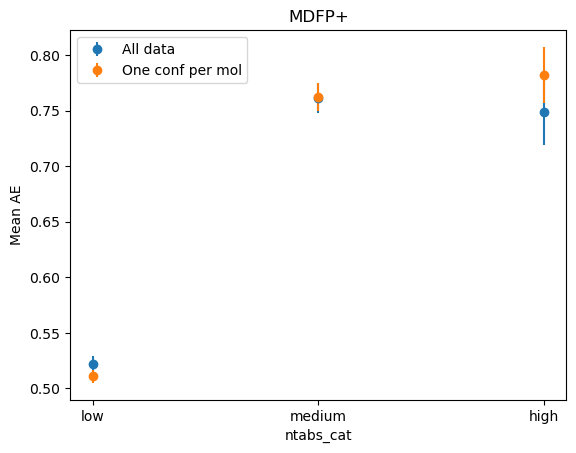

In [92]:
preds_all_flat = [item for sublist in preds_all for item in sublist]
ys_all_flat = [item for sublist in ys_all for item in sublist]
molregnos_all_flat = [item for sublist in molregnos_all for item in sublist]
df_results_all = pd.DataFrame({'molregno': molregnos_all_flat, 'vp_log10_pa': ys_all_flat, 'preds': preds_all_flat})
df_results_all['AE'] = np.abs(df_results_all['vp_log10_pa'] - df_results_all['preds'])

preds_selection_flat = [item for sublist in preds_selection for item in sublist]
ys_selection_flat = [item for sublist in ys_selection for item in sublist]
molregnos_selection_flat = [item for sublist in molregnos_selection for item in sublist]
df_results_selection = pd.DataFrame({'molregno': molregnos_selection_flat, 'vp_log10_pa': ys_selection_flat, 'preds': preds_selection_flat})
df_results_selection['AE'] = np.abs(df_results_selection['vp_log10_pa'] - df_results_selection['preds'])

#copmbine on molregno, suffices all and one_conf_per_mol
df_results_combined = df_results_all.merge(df_results_selection, on='molregno', suffixes=('_all', '_selection'))
#add ntabs
df_results_combined['ntabs'] = df_results_combined['molregno'].map(molregno_to_ntabs)
df_results_combined['ntabs_cat'] = pd.cut(df_results_combined['ntabs'], bins=[0, 50, 99999, 100000000], labels=['low', 'medium', 'high'])

#barplot: mean and 95CI of AE PhysChem and AE MDFP per ntabs_cat
import matplotlib.pyplot as plt
import seaborn as sns

#calculate mean and 95CI of AE PhysChem and AE MDFP per ntabs_cat
all_means = df_results_combined.groupby('ntabs_cat')['AE_all'].mean()
all_ci = df_results_combined.groupby('ntabs_cat')['AE_all'].std() * 1.96 / df_results_combined.groupby('ntabs_cat')['AE_all'].count()**0.5

selection_means = df_results_combined.groupby('ntabs_cat')['AE_selection'].mean()
selection_ci = df_results_combined.groupby('ntabs_cat')['AE_selection'].std() * 1.96 / df_results_combined.groupby('ntabs_cat')['AE_selection'].count()**0.5

#plot
plt.figure()
x = np.arange(len(all_means))
plt.errorbar(x, all_means, yerr=all_ci, label='All data',linestyle='',marker = 'o')
plt.errorbar(x, selection_means, yerr=selection_ci, label='One conf per mol',linestyle='',marker = 'o')
plt.xticks(x, ['low', 'medium', 'high'])
plt.xlabel('ntabs_cat')
plt.ylabel('Mean AE')
plt.title('MDFP+')

plt.legend()
plt.show()



